### Federico Ariton Higher Diploma in Science in Data Analytics for Business CA 1 Student Number:sba22090

In [1]:
# Importing the libraries
import pandas as pd
import numpy as np
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import scale
import warnings
warnings.filterwarnings('ignore') 

# Characterisation

In [2]:
# Importing the dataset
Covid_Data = pd.read_csv('Covid_Data.csv')
Covid_Data

,USMER,MEDICAL_UNIT,SEX,PATIENT_TYPE,DATE_DIED,INTUBED,PNEUMONIA,AGE,PREGNANT,DIABETES,...,ASTHMA,INMSUPR,HIPERTENSION,OTHER_DISEASE,CARDIOVASCULAR,OBESITY,RENAL_CHRONIC,TOBACCO,CLASIFFICATION_FINAL,ICU
0,2,1,1,1,03/05/2020,97,1,65,2,2,...,2,2,1,2,2,2,2,2,3,97
1,2,1,2,1,03/06/2020,97,1,72,97,2,...,2,2,1,2,2,1,1,2,5,97
2,2,1,2,2,09/06/2020,1,2,55,97,1,...,2,2,2,2,2,2,2,2,3,2
3,2,1,1,1,12/06/2020,97,2,53,2,2,...,2,2,2,2,2,2,2,2,7,97
4,2,1,2,1,21/06/2020,97,2,68,97,1,...,2,2,1,2,2,2,2,2,3,97
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1048570,2,13,2,1,9999-99-99,97,2,40,97,2,...,2,2,2,2,2,2,2,2,7,97
1048571,1,13,2,2,9999-99-99,2,2,51,97,2,...,2,2,1,2,2,2,2,2,7,2
1048572,2,13,2,1,9999-99-99,97,2,55,97,2,...,2,2,2,2,2,2,2,2,7,97
1048573,2,13,2,1,9999-99-99,97,2,28,97,2,...,2,2,2,2,2,2,2,2,7,97


In [3]:
# Size of the dataset
Covid_Data.shape

(1048575, 21)

In [4]:
# Implementing 'describe' method provides a summary of the
# statistics of the dataset numeric columns.
Covid_Data.describe()

,USMER,MEDICAL_UNIT,SEX,PATIENT_TYPE,INTUBED,PNEUMONIA,AGE,PREGNANT,DIABETES,COPD,ASTHMA,INMSUPR,HIPERTENSION,OTHER_DISEASE,CARDIOVASCULAR,OBESITY,RENAL_CHRONIC,TOBACCO,CLASIFFICATION_FINAL,ICU
count,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06
mean,1.632194e+00,8.980565e+00,1.499259e+00,1.190765e+00,7.952288e+01,3.346831e+00,4.179410e+01,4.976558e+01,2.186404e+00,2.260569e+00,2.242626e+00,2.298132e+00,2.128989e+00,2.435143e+00,2.261810e+00,2.125176e+00,2.257180e+00,2.214333e+00,5.305653e+00,7.955397e+01
std,4.822084e-01,3.723278e+00,4.999997e-01,3.929041e-01,3.686889e+01,1.191288e+01,1.690739e+01,4.751073e+01,5.424242e+00,5.132258e+00,5.114089e+00,5.462843e+00,5.236397e+00,6.646676e+00,5.194850e+00,5.175445e+00,5.135354e+00,5.323097e+00,1.881165e+00,3.682307e+01
min,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
25%,1.000000e+00,4.000000e+00,1.000000e+00,1.000000e+00,9.700000e+01,2.000000e+00,3.000000e+01,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,3.000000e+00,9.700000e+01
50%,2.000000e+00,1.200000e+01,1.000000e+00,1.000000e+00,9.700000e+01,2.000000e+00,4.000000e+01,9.700000e+01,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,6.000000e+00,9.700000e+01
75%,2.000000e+00,1.200000e+01,2.000000e+00,1.000000e+00,9.700000e+01,2.000000e+00,5.300000e+01,9.700000e+01,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,7.000000e+00,9.700000e+01
max,2.000000e+00,1.300000e+01,2.000000e+00,2.000000e+00,9.900000e+01,9.900000e+01,1.210000e+02,9.800000e+01,9.800000e+01,9.800000e+01,9.800000e+01,9.800000e+01,9.800000e+01,9.800000e+01,9.800000e+01,9.800000e+01,9.800000e+01,9.800000e+01,7.000000e+00,9.900000e+01


In [5]:
# Analyzing missing values in the dataset
Covid_Data.isnull().sum()

USMER                   0
MEDICAL_UNIT            0
SEX                     0
PATIENT_TYPE            0
DATE_DIED               0
INTUBED                 0
PNEUMONIA               0
AGE                     0
PREGNANT                0
DIABETES                0
COPD                    0
ASTHMA                  0
INMSUPR                 0
HIPERTENSION            0
OTHER_DISEASE           0
CARDIOVASCULAR          0
OBESITY                 0
RENAL_CHRONIC           0
TOBACCO                 0
CLASIFFICATION_FINAL    0
ICU                     0
dtype: int64

In [6]:
# Calling the 'info' method on the dataset 
Covid_Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 21 columns):
 #   Column                Non-Null Count    Dtype 
---  ------                --------------    ----- 
 0   USMER                 1048575 non-null  int64 
 1   MEDICAL_UNIT          1048575 non-null  int64 
 2   SEX                   1048575 non-null  int64 
 3   PATIENT_TYPE          1048575 non-null  int64 
 4   DATE_DIED             1048575 non-null  object
 5   INTUBED               1048575 non-null  int64 
 6   PNEUMONIA             1048575 non-null  int64 
 7   AGE                   1048575 non-null  int64 
 8   PREGNANT              1048575 non-null  int64 
 9   DIABETES              1048575 non-null  int64 
 10  COPD                  1048575 non-null  int64 
 11  ASTHMA                1048575 non-null  int64 
 12  INMSUPR               1048575 non-null  int64 
 13  HIPERTENSION          1048575 non-null  int64 
 14  OTHER_DISEASE         1048575 non-null  int64 
 15

In [7]:
# Implementing the data types of each column, and check the value,string,int...
Covid_Data.dtypes

USMER                    int64
MEDICAL_UNIT             int64
SEX                      int64
PATIENT_TYPE             int64
DATE_DIED               object
INTUBED                  int64
PNEUMONIA                int64
AGE                      int64
PREGNANT                 int64
DIABETES                 int64
COPD                     int64
ASTHMA                   int64
INMSUPR                  int64
HIPERTENSION             int64
OTHER_DISEASE            int64
CARDIOVASCULAR           int64
OBESITY                  int64
RENAL_CHRONIC            int64
TOBACCO                  int64
CLASIFFICATION_FINAL     int64
ICU                      int64
dtype: object

In [8]:
# Describing the value that has object,that we previously visualize in the .dtypes
Covid_Data.describe(include=object)

,DATE_DIED
count,1048575
unique,401
top,9999-99-99
freq,971633


In [9]:
# Visualizing the name of the columns
Covid_Data.columns

Index(['USMER', 'MEDICAL_UNIT', 'SEX', 'PATIENT_TYPE', 'DATE_DIED', 'INTUBED',
       'PNEUMONIA', 'AGE', 'PREGNANT', 'DIABETES', 'COPD', 'ASTHMA', 'INMSUPR',
       'HIPERTENSION', 'OTHER_DISEASE', 'CARDIOVASCULAR', 'OBESITY',
       'RENAL_CHRONIC', 'TOBACCO', 'CLASIFFICATION_FINAL', 'ICU'],
      dtype='object')

In the Boolean features, 1 means "yes" and 2 means "no". values as 97 and 99 are missing data.

In [10]:
# Checking which columns has the missing values
for col in Covid_Data.columns:
    print(col)
    print(Covid_Data.loc[Covid_Data[col] == 97, col].count())
    print(Covid_Data.loc[Covid_Data[col] == 98, col].count())
    print(Covid_Data.loc[Covid_Data[col] == 99, col].count())
    print()

USMER
0
0
0

MEDICAL_UNIT
0
0
0

SEX
0
0
0

PATIENT_TYPE
0
0
0

DATE_DIED
0
0
0

INTUBED
848544
0
7325

PNEUMONIA
0
0
16003

AGE
135
124
86

PREGNANT
523511
3754
0

DIABETES
0
3338
0

COPD
0
3003
0

ASTHMA
0
2979
0

INMSUPR
0
3404
0

HIPERTENSION
0
3104
0

OTHER_DISEASE
0
5045
0

CARDIOVASCULAR
0
3076
0

OBESITY
0
3032
0

RENAL_CHRONIC
0
3006
0

TOBACCO
0
3220
0

CLASIFFICATION_FINAL
0
0
0

ICU
848544
0
7488



# Data Cleannig

sex: 1 for female and 2 for male.

In [11]:
# Grouping the two columns and counting data,
# Monst of the 97 value is for male,coulb be a error
# We replace with value 2 = no
Covid_Data.groupby(['PREGNANT','SEX'])['SEX'].count()

PREGNANT  SEX
1         1        8131
2         1      513179
97        2      523511
98        1        3754
Name: SEX, dtype: int64

In [12]:
# Changing the value of the 97 and 98 in the column PREGNANT
Covid_Data.PREGNANT = Covid_Data.PREGNANT.replace(97, 2) 
Covid_Data.PREGNANT = Covid_Data.PREGNANT.replace(98, 2)

In [13]:
# Double checking if the change it was maded and make sure that
# there no is another missing values
Covid_Data.groupby(['PREGNANT','SEX'])['SEX'].count()

PREGNANT  SEX
1         1        8131
2         1      516933
          2      523511
Name: SEX, dtype: int64

In [79]:
# List of columns to check
columns_to_filter = ['PNEUMONIA', 'DIABETES', 'COPD', 'ASTHMA', 'INMSUPR', 
                     'HIPERTENSION', 'OTHER_DISEASE', 'CARDIOVASCULAR', 
                     'OBESITY', 'RENAL_CHRONIC', 'TOBACCO']

# Loop through each column and apply the filter
for col in columns_to_filter:
    Covid_Data = Covid_Data[Covid_Data[col].isin([1, 2])]

print('shape of dataset: - {Covid_Data.shape}')


shape of dataset: - {Covid_Data.shape}


In [15]:
# Checking the value 97 and 98 
Covid_Data['ICU'].value_counts()

97    833253
2     173154
1      16434
99      2311
Name: ICU, dtype: int64

In [16]:
# Checking the value 97 and 98 
Covid_Data['INTUBED'].value_counts()

97    833253
2     156712
1      33034
99      2153
Name: INTUBED, dtype: int64

In [17]:
# It contains a lot missing values,so we drop the columns.
# We cannot change the value for 1 or 2 because is not clear
# in this aspect  of the information on the dataset, we should contact
# the provider and get more information
Covid_Data.drop(['ICU', 'INTUBED'], axis=1, inplace=True)
# Checkin the size of the dataset
Covid_Data.shape

(1025152, 19)

In [18]:
# Checking again the dataset
Covid_Data

,USMER,MEDICAL_UNIT,SEX,PATIENT_TYPE,DATE_DIED,PNEUMONIA,AGE,PREGNANT,DIABETES,COPD,ASTHMA,INMSUPR,HIPERTENSION,OTHER_DISEASE,CARDIOVASCULAR,OBESITY,RENAL_CHRONIC,TOBACCO,CLASIFFICATION_FINAL
0,2,1,1,1,03/05/2020,1,65,2,2,2,2,2,1,2,2,2,2,2,3
1,2,1,2,1,03/06/2020,1,72,2,2,2,2,2,1,2,2,1,1,2,5
2,2,1,2,2,09/06/2020,2,55,2,1,2,2,2,2,2,2,2,2,2,3
3,2,1,1,1,12/06/2020,2,53,2,2,2,2,2,2,2,2,2,2,2,7
4,2,1,2,1,21/06/2020,2,68,2,1,2,2,2,1,2,2,2,2,2,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1048570,2,13,2,1,9999-99-99,2,40,2,2,2,2,2,2,2,2,2,2,2,7
1048571,1,13,2,2,9999-99-99,2,51,2,2,2,2,2,1,2,2,2,2,2,7
1048572,2,13,2,1,9999-99-99,2,55,2,2,2,2,2,2,2,2,2,2,2,7
1048573,2,13,2,1,9999-99-99,2,28,2,2,2,2,2,2,2,2,2,2,2,7


changing the value of death with the date 9999-99-99 that mean it wasn't dead,so whe change the values with the value of 2 "no" change and the other dates with 1 "yes"

In [19]:
# Create the 'DEATH' column using vectorized comparison
# 
Covid_Data['DEATH'] = (Covid_Data['DATE_DIED'] == '9999-99-99').astype(int) + 1

# Count the values in 'DEATH'
death_counts = Covid_Data['DEATH'].value_counts()

In [20]:
Covid_Data['DEATH'].value_counts()

2    950438
1     74714
Name: DEATH, dtype: int64

In [21]:
# Dropping the column DATE_DIED
Covid_Data.drop('DATE_DIED', axis=1, inplace=True)
Covid_Data.shape

(1025152, 19)

In [22]:
# Checking if the column DEATH it was created and the column
# 'DATE_DIED' it was droped
Covid_Data.columns

Index(['USMER', 'MEDICAL_UNIT', 'SEX', 'PATIENT_TYPE', 'PNEUMONIA', 'AGE',
       'PREGNANT', 'DIABETES', 'COPD', 'ASTHMA', 'INMSUPR', 'HIPERTENSION',
       'OTHER_DISEASE', 'CARDIOVASCULAR', 'OBESITY', 'RENAL_CHRONIC',
       'TOBACCO', 'CLASIFFICATION_FINAL', 'DEATH'],
      dtype='object')

In [82]:
# Cheking the value the column DEATH if was change correctly
Covid_Data['DEATH']

0          1
1          1
2          1
3          1
4          1
          ..
1048570    2
1048571    2
1048572    2
1048573    2
1048574    2
Name: DEATH, Length: 1025152, dtype: int32

# EDA

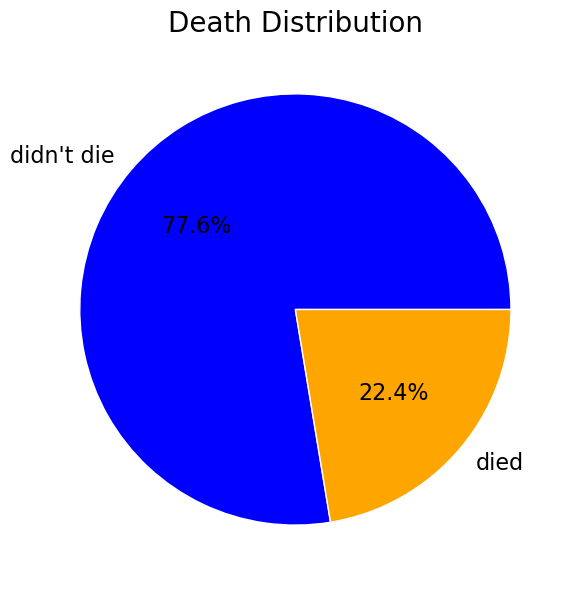

In [86]:
# Visualazing the DEATH distribution
fig, ax = plt.subplots(figsize=(7, 7))
ax.pie(
    Covid_Data.DEATH.value_counts().values, labels=['didn\'t die', 'died'], autopct='%1.1f%%',
    startangle=0, textprops={'fontsize': 16}, colors=['#0000FF', '#FFA500'], wedgeprops={'edgecolor': '#fff'}
)
ax.set_title('Death Distribution', fontsize=20, color='black')
plt.show()

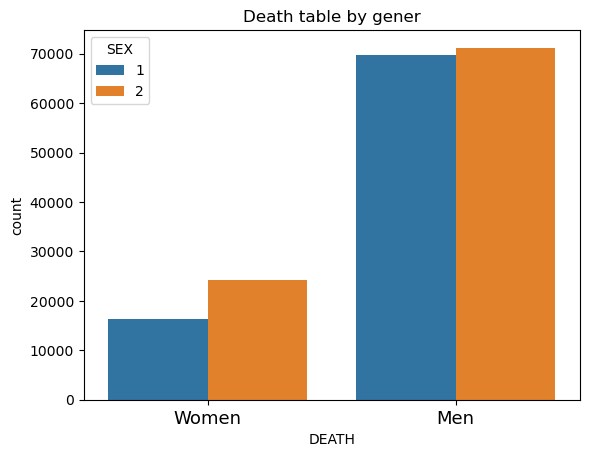

In [28]:
# Visualazing the DEATH by SEX distribution
sns.countplot(x='DEATH' , hue = 'SEX',data = Covid_Data_1)
plt.title('Death table by gener')
plt.xticks([0, 1], ['Women', 'Men'], fontsize=13);

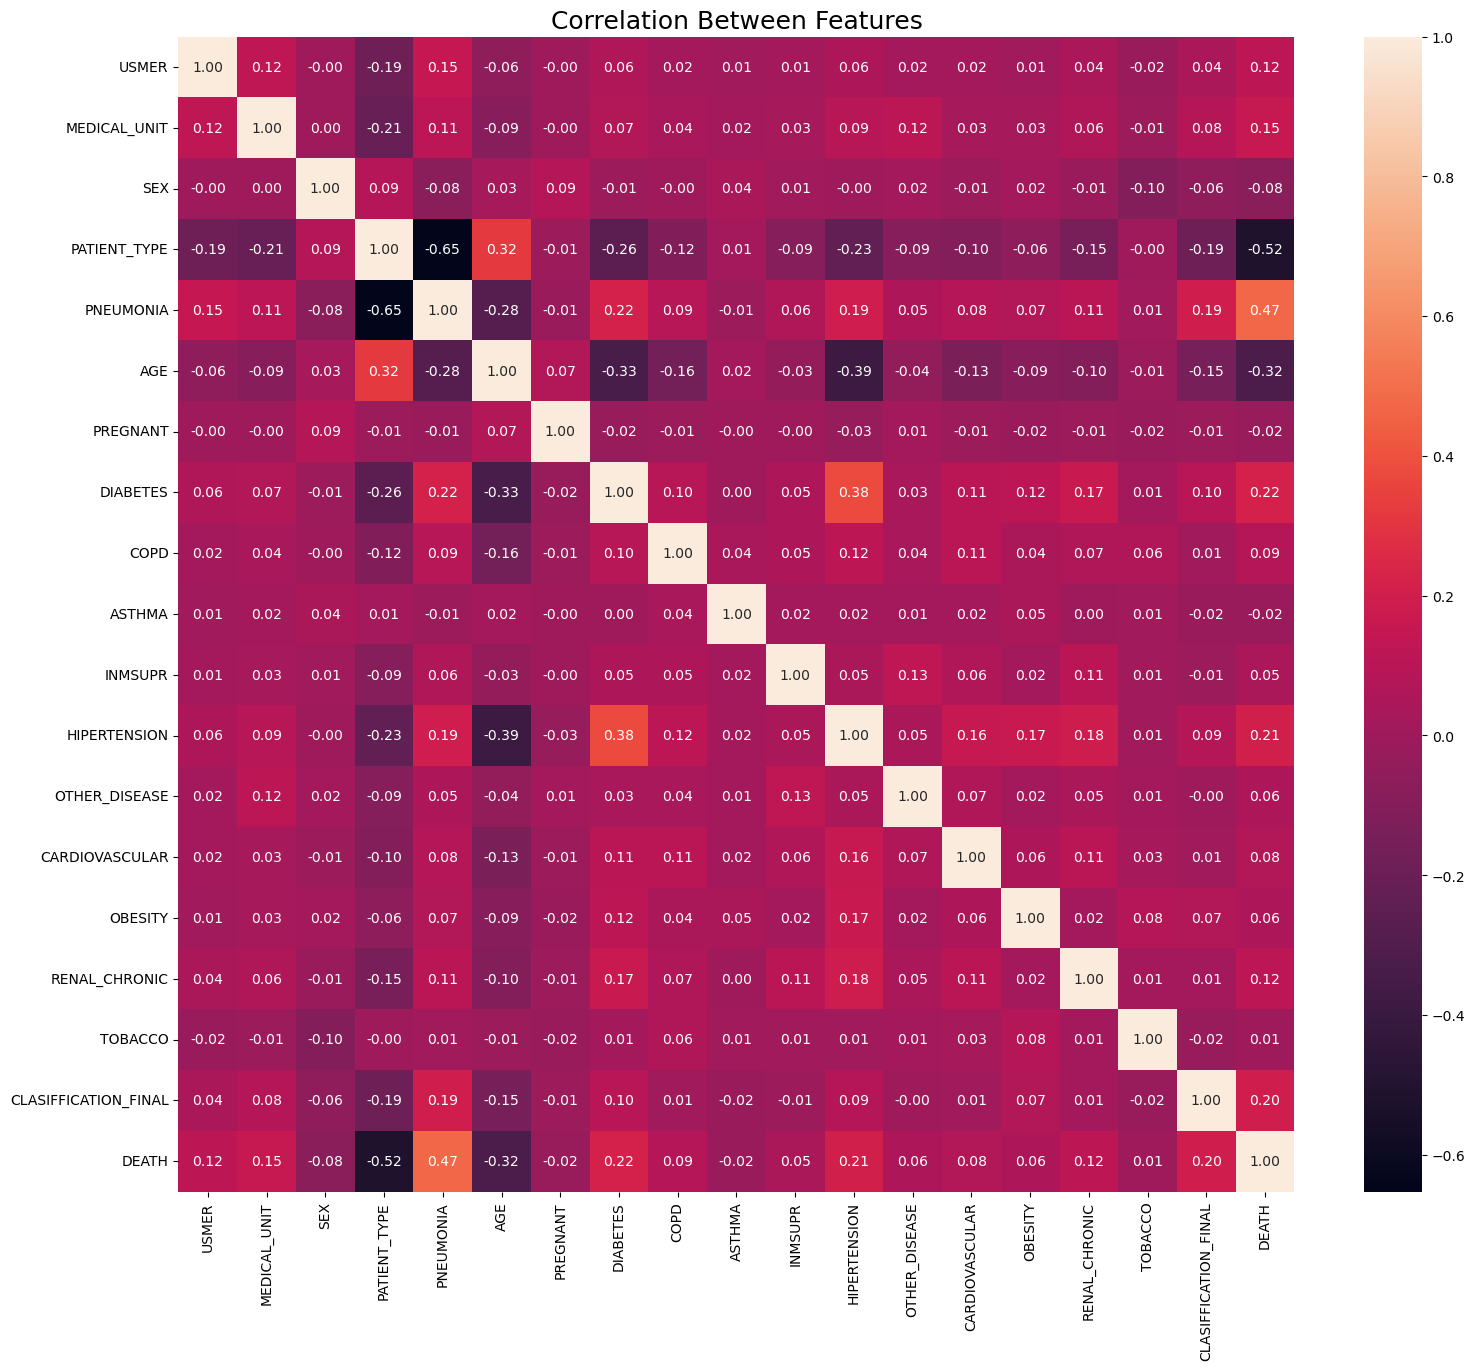

In [97]:
# Visualizing the features in our data set measuring how
# close are realted two variable to each other
plt.figure(figsize=(18,15))
sns.heatmap(Covid_Data.corr(), annot=True, fmt='.2f')
plt.title('Correlation Between Features', fontsize=18)
plt.show()

# Splitting Data into Training and Testing

In [30]:
# Apply the StandardScaler to the 'AGE' column of the Covid_Data dataset
# fit_transform() standardizes the 'AGE' column,
# scaling it to have mean 0 and variance 1
from sklearn.preprocessing import StandardScaler
standard_scaler = StandardScaler()
Covid_Data['AGE'] = standard_scaler.fit_transform(Covid_Data.loc[:,['AGE']])

In [31]:
# Extracting the target variable 'DEATH'
# The variable 'y' is what the model will be trained to predict.
y = Covid_Data['DEATH']

# Dropping the 'DEATH' column from the Covid_Data dataset
# to create the feature set.
x = Covid_Data.drop('DEATH', axis=1)

In [32]:
# Splitting the dataset into training and testing sets.
# Will be use 20% of the data for testing, and the rest for training
X_train, X_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=42)

# Getting the shape of the training and testing sets for both features (X) and target (y).
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((820121, 18), (205031, 18), (820121,), (205031,))

# Model Logistic Regression and sampling the data

In [33]:
# This instance 'log_reg' will be used to train the model and make predictions.
log_reg = LogisticRegression()

# Evaluating the model on the test data.
log_reg.fit(X_train, y_train)
print("Logistic Regression Accuracy :", log_reg.score(X_test, y_test))

Logistic Regression Accuracy : 0.9384532095146587


In [36]:
# Calculating the F1 score for each class in the target variable.
from sklearn.metrics import f1_score
print("Logistic Regression F1 Score : ", f1_score(y_test, log_reg.predict(X_test),average=None))

Logistic Regression F1 Score :  [0.50627959 0.96718101]


Text(0.5, 1.0, 'Logistic Regression Confusion Matrix')

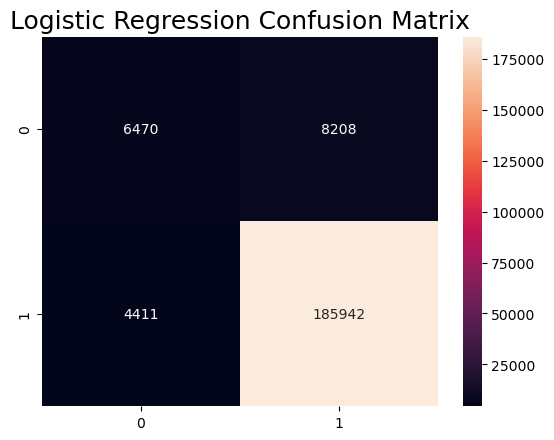

In [37]:
# Visualazing the confusion Matrix
# We can see that are a lot true negatives
# This can be for imbalanced data
sns.heatmap(confusion_matrix(y_test, log_reg.predict(X_test)), annot=True, fmt='.0f')
plt.title("Logistic Regression Confusion Matrix", fontsize=18)

Text(0.5, 1.0, 'Death Distribution')

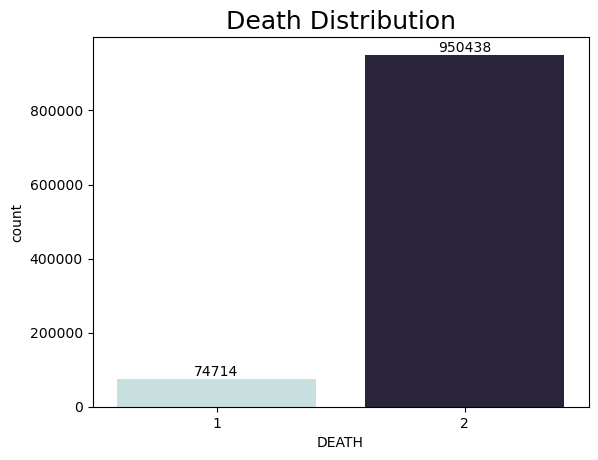

In [38]:
# Visualazing the Death distrbution
# We can se that is very imbalanced
ax = sns.countplot(x=Covid_Data['DEATH'],palette='ch:start=.2,rot=-.3')
plt.bar_label(ax.containers[0])
plt.title('Death Distribution', fontsize=14)

In [39]:
from imblearn.under_sampling import RandomUnderSampler
# Applying the under-sampling on the dataset.
# This will reduce the number of instances in the majority class to match
# the number in the minority class.
rand_under = RandomUnderSampler(random_state=0)
x_resampled, y_resampled = rand_under.fit_resample(x,y)

Text(0.5, 1.0, 'Death Distribution After Resampling')

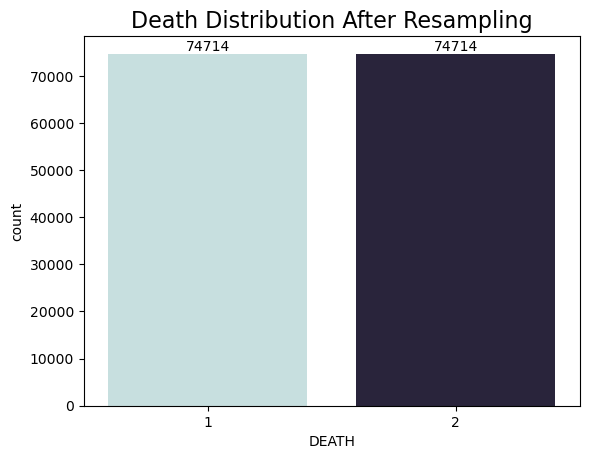

In [40]:
# Visualazing after sampling the data
ax = sns.countplot(x=y_resampled,palette='ch:start=.2,rot=-.3')
plt.bar_label(ax.containers[0])
plt.title("Death Distribution After Resampling", fontsize=14)

In [41]:
# Splitting the resampled dataset into training and testing sets.
X_train, X_test, y_train, y_test = train_test_split(x_resampled, y_resampled, test_size=0.2, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((119542, 18), (29886, 18), (119542,), (29886,))

In [43]:
# Training the Logistic Regression model on the resampled training data.
log_reg.fit(X_train, y_train)
print("Logistic Regression Accuracy :", log_reg.score(X_test, y_test))

Logistic Regression Accuracy : 0.9106939704209329


In [44]:
from sklearn.metrics import f1_score
# The f1_score function compares the true target values (y_test) with the predicted values (predicted_y).
print("Logistic Regression F1 Score : ", f1_score(y_test, log_reg.predict(X_test),average=None))

Logistic Regression F1 Score :  [0.91196358 0.9093872 ]


Text(0.5, 1.0, 'Logistic Regression Confusion Matrix')

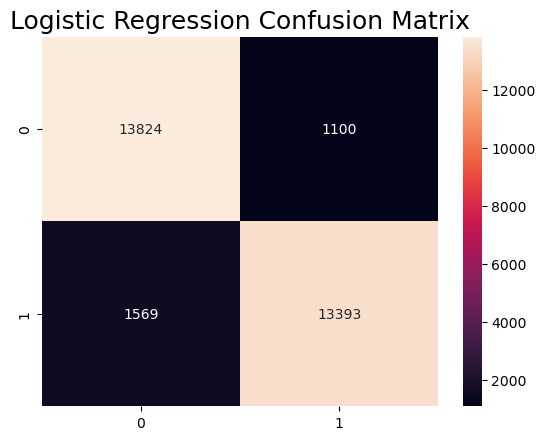

In [45]:
# Calculating the confusion matrix for the true and predicted values.
sns.heatmap(confusion_matrix(y_test, log_reg.predict(X_test)), annot=True, fmt='.0f')
plt.title("Logistic Regression Confusion Matrix", fontsize=18)

# Random forest

In [46]:
from sklearn.ensemble import RandomForestClassifier
# Creating an instance of the RandomForestClassifier.
# n_estimators=100 sets the number of trees in the forest to 100.
random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(X_train, y_train)

RandomForestClassifier()

In [47]:
from sklearn.metrics import accuracy_score
# Using the trained Random Forest model to predict the labels of the test set.
print('Random Forest Accuracy Score :', accuracy_score(y_test,random_forest.predict(X_test)))

Random Forest Accuracy Score : 0.9048718463494613


Text(0.5, 1.0, 'Random Forest Confusion Matrix')

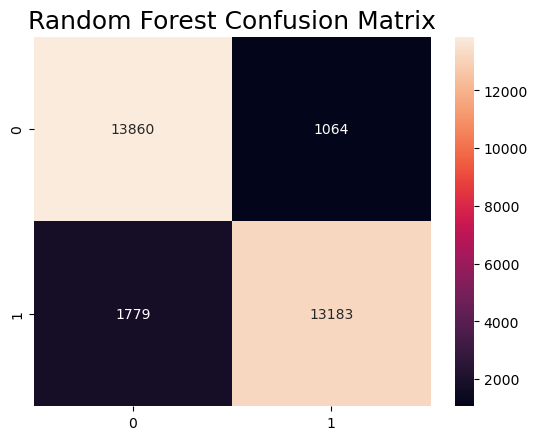

In [48]:
# Visualazing the confusion Matrix
sns.heatmap(confusion_matrix(y_test, random_forest.predict( X_test)), annot=True, fmt='.0f')
plt.title("Random Forest Confusion Matrix", fontsize=18)

In [93]:
# Create Decision Tree classifer object
clf = DecisionTreeClassifier(max_depth = 3, random_state = 0)

# Train Decision Tree Classifer
clf = clf.fit(X_train, y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

In [94]:
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

# Rounded upto 2 decimal places
print( "Accuracy: {:.2f}".format(metrics.accuracy_score(y_test, y_pred)) )

Accuracy: 0.9093555510941578
Accuracy: 0.91


In [95]:
Covid_Data.columns


Index(['USMER', 'MEDICAL_UNIT', 'SEX', 'PATIENT_TYPE', 'PNEUMONIA', 'AGE',
       'PREGNANT', 'DIABETES', 'COPD', 'ASTHMA', 'INMSUPR', 'HIPERTENSION',
       'OTHER_DISEASE', 'CARDIOVASCULAR', 'OBESITY', 'RENAL_CHRONIC',
       'TOBACCO', 'CLASIFFICATION_FINAL', 'DEATH'],
      dtype='object')

# PCA

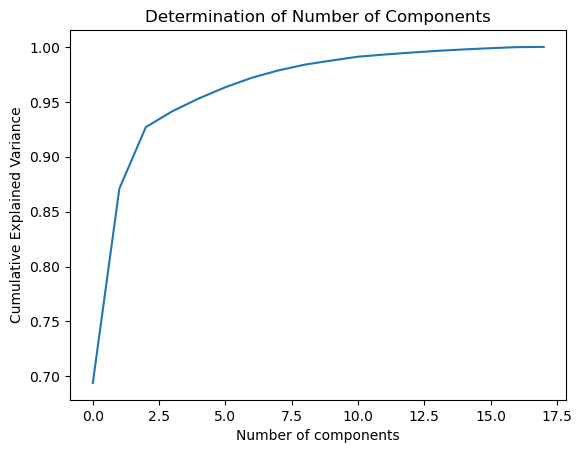

In [49]:
# Creating a PCA object and fitting it to the training data.
# This will compute the principal components for the training data (X_train).
from sklearn.decomposition import PCA
pca1 = PCA().fit(X_train)
plt.plot(np.cumsum(pca1.explained_variance_ratio_))
plt.xlabel('Number of components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Determination of Number of Components')
plt.show()

In [50]:
# Initializing PCA with 4 components.
# n_components=4 means that PCA will reduce the data to 4 dimensions.
pca = PCA(n_components=4)
pca.fit(X_train)
reduced_X = pca.transform(X_train)
print(f'Shape of reduced data: - {reduced_X.shape}')

Shape of reduced data: - (119542, 4)


In [51]:
# Visualizing the reduced dataset
reduced_Test = pca.transform(X_test)
print(f'Shape of reduced data: - {reduced_Test.shape}')

Shape of reduced data: - (29886, 4)


In [52]:
# Creating a Logistic Regression model to use with 
# the reduced dimensionality data from PCA.
pca_lr = LogisticRegression()
pca_lr.fit(reduced_X, y_train)
pred_lr_pca = pca_lr.predict(reduced_Test)

In [90]:
# Calculating the weighted F1 score for the true and predicted labels.
# The 'weighted' average takes into account label imbalance
# by weighting the F1 score of each class by its support.
def metric(model_name, y_true, y_pred):
    cm = confusion_matrix(y_true, y_pred)
    f1 = f1_score(y_true, y_pred, average='weighted')
    print(f"{model_name} Confusion Matrix:\n{cm}")
    print(f"{model_name} F1 Score: {f1}")

# Assuming that the y_test and pred_lr_pca from the model
metric('PCA: Logistic Regression',y_test, pred_lr_pca)


PCA: Logistic Regression Confusion Matrix:
[[13525  1399]
 [ 1666 13296]]
PCA: Logistic Regression F1 Score: 0.897436598079834


In [54]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report

In [91]:
# Running differents model from the PCA
models = []
models.append(('LR', LogisticRegression(solver='liblinear', multi_class='ovr')))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))

In [92]:
# Implementing the model,and displaying the accurancy
results = []
names = []
for name, model in models:
	kfold = StratifiedKFold(n_splits=10, random_state=1, shuffle=True)
	cv_results = cross_val_score(model,reduced_X,y_train, cv=kfold, scoring='accuracy')
	results.append(cv_results)
	names.append(name)
	print('%s: %f (%f)' % (name, cv_results.mean(), cv_results.std()))

LR: 0.891846 (0.002536)
LDA: 0.892381 (0.002529)
KNN: 0.895852 (0.001694)
CART: 0.879649 (0.001824)
NB: 0.891929 (0.002077)


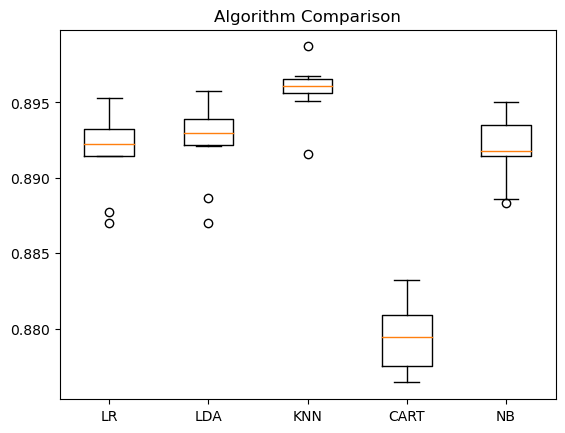

In [57]:
# Visualazing a boxplot of the algorithm comparison
pyplot.boxplot(results, labels=names)
pyplot.title('Algorithm Comparison')
pyplot.show()

# The KNN Model

In [58]:
# Create KNN Classifier
kNN = KNeighborsClassifier(n_neighbors = 3)

# Train the model using the training sets
kNN.fit(X_train, y_train)

# Predict the response for test dataset
y_pred = kNN.predict(X_test)

In [59]:
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics

# Model Accuracy
print( "Accuracy: {:.2f}".format(metrics.accuracy_score(y_test, y_pred)) )

Accuracy: 0.90


<Axes: >

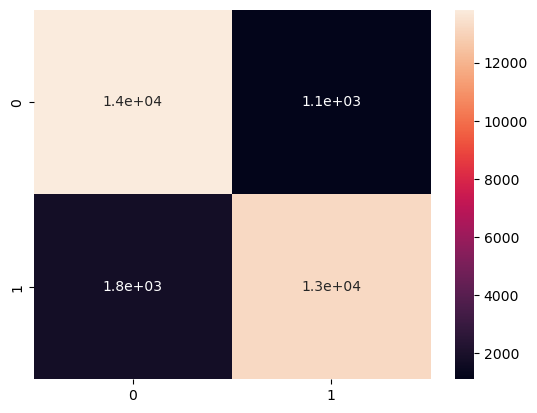

In [60]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Call a method predict by using an object classifier 'cls_svm'
y_predict = kNN.predict(X_test)

# Calculate cm by calling a method named as 'confusion_matrix'
cm = confusion_matrix(y_test, y_predict)

# Call a method heatmap() to plot confusion matrix
sns.heatmap(cm, annot = True)

In [98]:
kNN = KNeighborsClassifier(n_neighbors=5, metric="minkowski", p=2)
kNN.fit(X_train,y_train)

KNeighborsClassifier()

# GaussianNB

In [99]:
# Fitting Naive Bayes Classification to the Training set with linear kernel
from sklearn.naive_bayes import GaussianNB

# Create an initialise an object 'nvclassifier' by calling a method 'GaussianNB()'
nvclassifier = GaussianNB()

# Call fit() method for training the dataset
nvclassifier.fit(X_train, y_train)

GaussianNB()

In [65]:
# Predicting the Test set results
y_pred = nvclassifier.predict(X_test)

# Display the predicted values
print(y_pred)

[2 1 1 ... 1 2 2]


In [75]:
#Import Gaussian Naive Bayes model
[2 1 1 ... 1 2 2]
from sklearn.naive_bayes import GaussianNB

#Create a Gaussian Classifier
gnb = GaussianNB()

#Train the model using the training sets
gnb.fit(X_train, y_train)

#Predict the response for test dataset
y_pred = gnb.predict(X_test)

In [76]:
# Model Accuracy, how often is the classifier correct
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.8752927792277321


In [77]:
from sklearn.model_selection import cross_val_score
gnb = GaussianNB()
cross_val_score(gnb, x, y, scoring='accuracy', cv=30).mean()

0.8775230625457977

In [66]:
# Check the actual and predicted value side by side
y_compare = np.vstack((y_test,y_pred)).T
# actual value on the left side and predicted value on the right hand side
# printing the top 10 values
y_compare[:10,:]

array([[2, 2],
       [1, 1],
       [1, 1],
       [2, 2],
       [1, 1],
       [2, 2],
       [2, 1],
       [1, 1],
       [1, 1],
       [2, 1]], dtype=int32)

In [67]:
from sklearn.metrics import accuracy_score
score = accuracy_score(y_test, y_pred)
print(score)

0.8752927792277321


<Axes: >

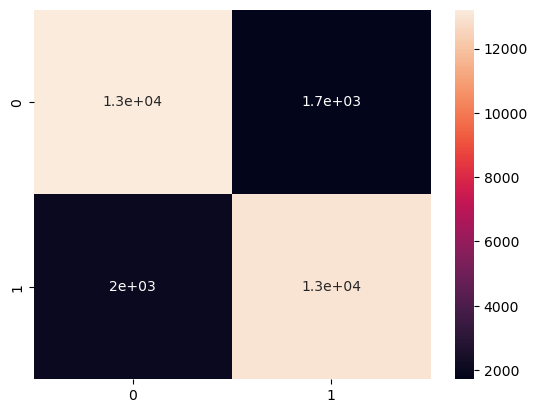

In [68]:
# Construct the Confusion Matrix
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Create and initialise an object 'cm' by calling a method 'confusion_matrix()'
cm = confusion_matrix(y_test, y_pred)

# Call a method heatmap() to plot confusion matrix
sns.heatmap(cm, annot = True)

# print(cm, cm.shape)

In [72]:
from sklearn.model_selection import cross_val_score

# Create an initialise an object 'nvclassifier' by calling a method 'GaussianNB()'
nvclassifier = GaussianNB()

# Calculate the score using cross validation method
cross_val_score(nvclassifier, x, y, scoring = 'accuracy', cv = 20).mean()

0.8763719519086793

In [73]:
#Support Vector Classification model
from sklearn.svm import SVC
svc_model = SVC()
svc_model.fit(X_train, y_train)

SVC()

              precision    recall  f1-score   support

           1       0.88      0.95      0.91     14924
           2       0.95      0.87      0.91     14962

    accuracy                           0.91     29886
   macro avg       0.91      0.91      0.91     29886
weighted avg       0.91      0.91      0.91     29886



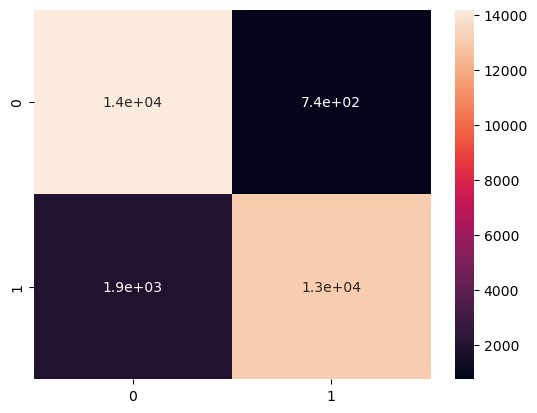

In [74]:
from sklearn.metrics import classification_report, confusion_matrix
y_predict = svc_model.predict(X_test)
cm = confusion_matrix(y_test, y_predict)
sns.heatmap(cm, annot=True)
print(classification_report(y_test, y_predict))

# Splitting the data in 10 %

In [100]:
# Splitting the dataset into training and testing sets.
# Will be use 20% of the data for testing, and the rest for training
X_train, X_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=42)

In [101]:
# Getting the shape of the training and testing sets for both features (X) and target (y).
X_train.shape, X_test.shape, y_train.shape, y_test.shape


((820121, 18), (205031, 18), (820121,), (205031,))

In [102]:
# Create KNN Classifier
kNN = KNeighborsClassifier(n_neighbors = 3)

# Train the model using the training sets
kNN.fit(X_train, y_train)

# Predict the response for test dataset
y_pred = kNN.predict(X_test)


In [103]:
# Model Accuracy, how often is the classifier correct?
print( "Accuracy: {:.2f}".format(metrics.accuracy_score(y_test, y_pred)) )


Accuracy: 0.93


<Axes: >

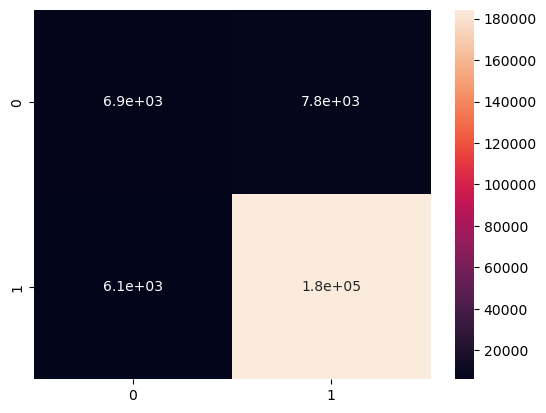

In [104]:
# Call a method predict by using an object classifier 'cls_svm'
y_predict = kNN.predict(X_test)

# Calculate cm by calling a method named as 'confusion_matrix'
cm = confusion_matrix(y_test, y_predict)

# Call a method heatmap() to plot confusion matrix
sns.heatmap(cm, annot = True)